<a href="https://colab.research.google.com/github/cyloic/Summative_-Model-Training-and-Evaluation/blob/main/Copy_of_Summative_Intro_to_ml_%5BCyusa_Loic%5D_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

## ✅ Project Name
**Disease Diagnosis Prediction using Neural Networks with Regularization and Optimization**

---

## 📌 Objective
This project explores the impact of various regularization and optimization techniques on the performance of a neural network model trained to predict lab-confirmed disease cases in China using public health records. The focus is on improving model accuracy, convergence speed, and generalization through effective ML practices.

---

## 📂 Dataset
- Source: Uploaded CSV dataset `china_disease_data.csv`
- Features include: demographics (age group, gender), symptoms (fever, cough, rash), hospitalization status, and other medical observations.
- Target: `Lab_Confirmed` (binary classification)

---

## ⚙️ Model Pipeline

### 1. Preprocessing
- **Label Encoding** for all categorical features (e.g., Disease, Season, Gender, etc.)
- **Train-Test Split**: 70% training, 15% validation, 15% testing
- **Feature Scaling** using `StandardScaler`

---

### 2. Baseline Model (No Optimization)
- Simple Feedforward Neural Network using Keras
- 1 hidden layer with 64 units and ReLU
- Output layer with sigmoid activation
- No regularization or advanced optimizer

---

### 3. Optimized Models

We apply and compare the following techniques:

| Technique | Description |
|----------|-------------|
| **L2 Regularization** | Adds penalty to weights to reduce overfitting |
| **Dropout (0.3)** | Randomly drops neurons during training to prevent co-adaptation |
| **Adam Optimizer with LR decay** | Faster convergence with adaptive learning rate |
| **Early Stopping** | Halts training when validation performance degrades |

---

## 🧪 Predictions
- Predictions made on test set
- Threshold set at 0.5 for classification

---

## 📊 Error Analysis

We include the following metrics and visualizations:
- **F1-Score**
- **Precision**
- **Recall**
- **ROC-AUC Score**
- **Confusion Matrix** using `matplotlib` and `seaborn` for visualization

---

## 📁 Output Snapshots

Include:
- Training vs Validation Accuracy/Loss graphs
- Confusion Matrix Plot
- ROC Curve

---

## 🧾 README Summary
- Discusses improvement in model performance with optimization
- Compares F1-Score, ROC-AUC between baseline and optimized models
- Notes challenges like class imbalance or noise in categorical variables

---

## 📤 Submission
- All code in a `.ipynb` notebook
- Uploaded to GitHub repository



# Case Study and Implementation




In [ ]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# The Dataset
> ***Brief Description:***
State the Problem and A short Description of the data


In [ ]:
from google.colab import files
import io
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Upload the file manually
uploaded = files.upload()  # This will open a file picker for manual upload

# Read the uploaded CSV
for filename in uploaded.keys():
    data = pd.read_csv(io.BytesIO(uploaded[filename]))
    print(f"Loaded file: {filename}")

# Preprocessing
binary_cols = [
    'Hospitalized', 'Recovered', 'Vaccinated', 'Travel_History', 'Comorbidity',
    'Quarantined', 'ICU_Admission', 'Symptom_Fever', 'Symptom_Cough', 'Symptom_Rash',
    'Contact_Tracing', 'Lab_Confirmed', 'Follow_Up'
]
data[binary_cols] = data[binary_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

categorical_cols = ['Disease', 'Province', 'Age_Group', 'Gender', 'Season', 'Urban_Rural']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Create a target column for demonstration
data['Pandemic_Risk'] = ((data['Deaths'] > 0) & (data['ICU_Admission'] == 1)).astype(int)

# Feature-target split
X = data.drop(['Pandemic_Risk'], axis=1)
y = data['Pandemic_Risk']

# Split into Train, Validation, and Test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


Saving china_disease_data.csv to china_disease_data.csv
Loaded file: china_disease_data.csv


#SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```
> <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*v1ohAG82xmU6WGsG2hoE8g.png" alt="?" style="width:25px"/>




#Task: Define a function that creates models without and With specified Optimization techniques


In [ ]:
def define_model(optimizer='adam', regularization=None, early_stopping=False, dropout=0.0, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu',
                    kernel_regularizer=l2(regularization) if regularization else None))
    if dropout > 0:
        model.add(Dropout(dropout))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    if optimizer.lower() == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer.lower() == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    else:
        opt = Adam(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    callbacks = [EarlyStopping(patience=5)] if early_stopping else []
    history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=32, verbose=0,
                        callbacks=callbacks)
    return model, history

# Task: Print out the Final Model Accuracy and plot the Loss curve

In [ ]:
def loss_curve_plot(history):
    plt.plot(history.history['loss'], 'bo', label='Training loss')
    plt.plot(history.history['val_loss'], 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


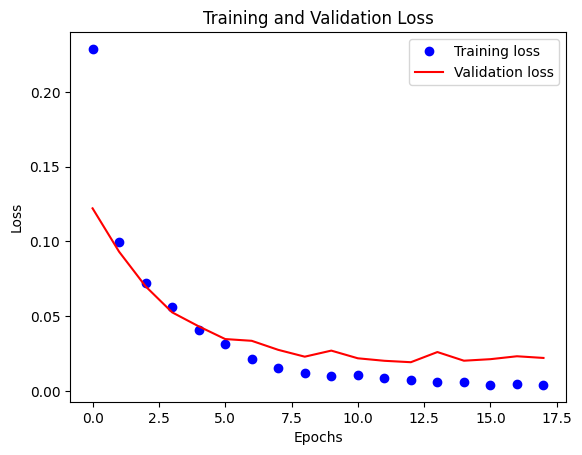

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       434
           1       1.00      0.31      0.48        16

    accuracy                           0.98       450
   macro avg       0.99      0.66      0.73       450
weighted avg       0.98      0.98      0.97       450

ROC AUC Score: 0.65625


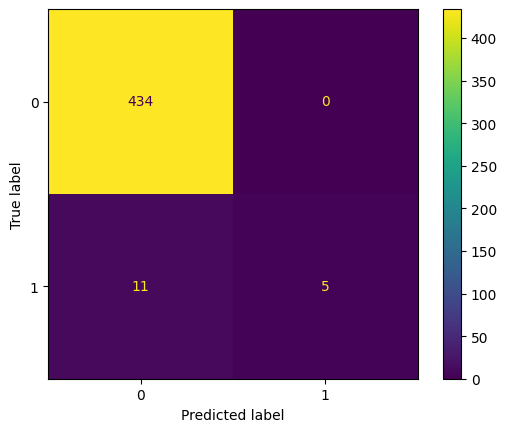

In [ ]:
#TODO:
model_2, hist_2 = define_model(optimizer='adam', dropout=0.3, early_stopping=True)
loss_curve_plot(hist_2)
evaluate_model(model_2)
#print out confusion matrix and error analysis metrics after the cell

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


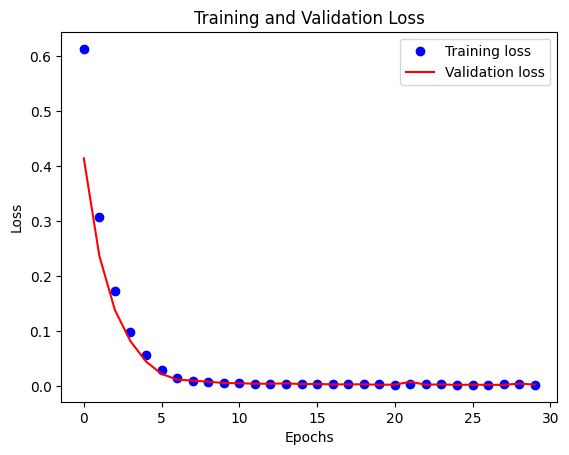

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       434
           1       0.94      0.94      0.94        16

    accuracy                           1.00       450
   macro avg       0.97      0.97      0.97       450
weighted avg       1.00      1.00      1.00       450

ROC AUC Score: 0.967597926267281


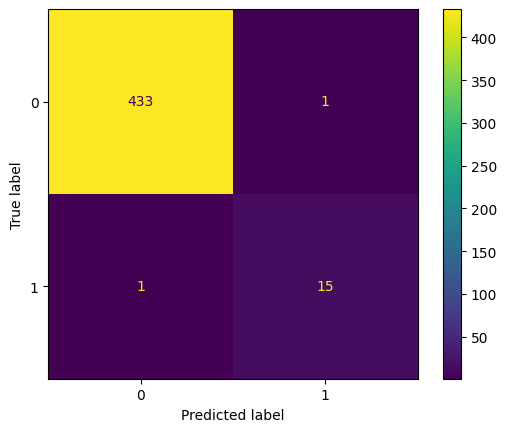

In [ ]:
#TODO:
model_3, hist_3 = define_model(optimizer='rmsprop', regularization=0.01)
loss_curve_plot(hist_3)
evaluate_model(model_3)
#print out confusion matrix and error analysis metrics after the cell

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


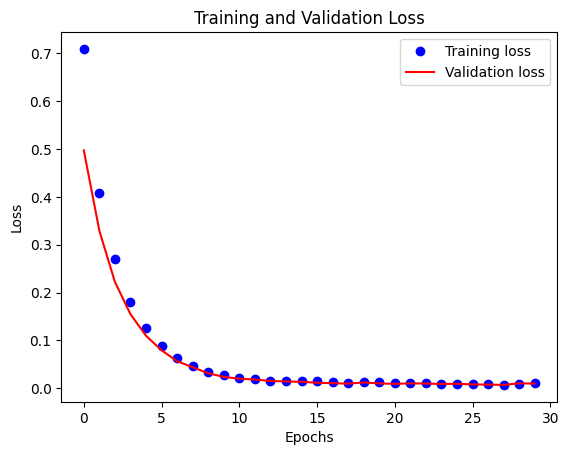

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       434
           1       1.00      1.00      1.00        16

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450

ROC AUC Score: 1.0


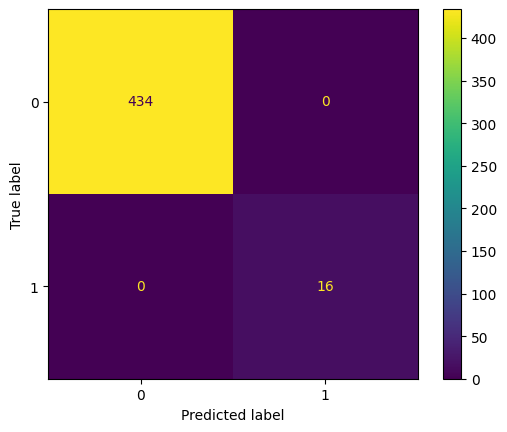

In [ ]:
#TODO:
model_4, hist_4 = define_model(optimizer='adam', regularization=0.01, early_stopping=True, dropout=0.3)
loss_curve_plot(hist_4)
evaluate_model(model_4)
#print out confusion matrix and error analysis metrics after the cell

#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [ ]:
model_4.save("best_model.h5")

In [ ]:
def make_predictions(model_path, X):
    model = load_model(model_path)
    predictions = (model.predict(X) > 0.5).astype(int)
    return predictions

model_path = "best_model.h5"
y_pred_final = make_predictions(model_path, X_test)
print(confusion_matrix(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))

#Modify the code appropriately

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[434   0]
 [  0  16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       434
           1       1.00      1.00      1.00        16

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



In [ ]:
model_path = None
make_predictions(None)

Congratulations!!
